<a href="https://colab.research.google.com/github/SansBasnet/Deep_Learning/blob/master/Equipment_Failure_Pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Equipment Failure and maintaince prediction using Machine Learning.

### Understanding the balance between the economic costs of over-and-under-maintanence.

## There are 3 scenarios in equipment failure:

- Too many maintainance i.e. unnecessary maintenance yields work disruption (not optmial).
- Too fewer maintaince i.e. not enough care for maintenance yields larger costs with replacement (not optimal).
- Right amount (optimal). 

In [1]:
from IPython.display import display
import pandas as pd

#Assume a table as below:
dict= {'Maintenance Scenario': ['Unnecessary Maintenance','Timely and Appropriate Maintenance',
                                'Machine Runs to Failure','Total'],
       'Number of Incidents':[9, 27, 385, 421],
       'Cost per Incident': ['$1500', '$7,500', '$30,000', '$27,948'],
       'Total Cost': ['$13,500', '$202,500','$11,550,000','$11,766,000']}

maintain_df = pd.DataFrame(dict)
display(maintain_df)

,Maintenance Scenario,Number of Incidents,Cost per Incident,Total Cost
0,Unnecessary Maintenance,9,$1500,"$13,500"
1,Timely and Appropriate Maintenance,27,"$7,500","$202,500"
2,Machine Runs to Failure,385,"$30,000","$11,550,000"
3,Total,421,"$27,948","$11,766,000"


In [2]:
#!pip install imbalanced-learn -- upgrade
!pip install plotly --upgrade
!pip install chart-studio --upgrade

     |████████████████████████████████| 64 kB 2.5 MB/s 
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11447 sha256=f76e6dba6988c400725f89f350de4559d41156d18313388fb8496c0629ed2be6
  Stored in directory: /root/.cache/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying


In [3]:
!pip install scikit-learn==0.23.1
!pip install imbalanced-learn==0.7.0

     |████████████████████████████████| 6.8 MB 6.0 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.23.1 which is incompatible.
     |████████████████████████████████| 167 kB 8.2 MB/s 
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.8.1
    Uninstalling imbalanced-learn-0.8.1:
      Successfully uninstalled imbalanced-learn-0.8.1


In [4]:
import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly as plotly
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
import types

def __iter__(self): return 0

NOTE: this is a machine generated fake data.

In [68]:
!wget https://raw.githubusercontent.com/SansBasnet/Deep_Learning/master/equipment_failure_data_1.csv
!wget https://raw.githubusercontent.com/SansBasnet/Deep_Learning/master/equipment_failure_data_2.csv

pd_data_1 = pd.read_csv("equipment_failure_data_1.csv", sep=",", header=0)
pd_data_2 = pd.read_csv("equipment_failure_data_2.csv", sep=",", header=0)

#concatenate
pd_data = pd.concat([pd_data_1, pd_data_2])

--2022-02-09 01:03:26--  https://raw.githubusercontent.com/SansBasnet/Deep_Learning/master/equipment_failure_data_1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11219474 (11M) [text/plain]
Saving to: ‘equipment_failure_data_1.csv.1’

equipment_failure_d 100%[===================>]  10.70M  --.-KB/s    in 0.08s   

2022-02-09 01:03:26 (140 MB/s) - ‘equipment_failure_data_1.csv.1’ saved [11219474/11219474]

--2022-02-09 01:03:26--  https://raw.githubusercontent.com/SansBasnet/Deep_Learning/master/equipment_failure_data_2.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP req

In [69]:
pd_data.head()

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT
0,100001,12/2/14,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880
1,100001,12/3/14,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881
2,100001,12/4/14,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882
3,100001,12/5/14,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883
4,100001,12/6/14,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884


In [70]:
pd_data.shape

(307751, 16)

In [8]:
xxxx = pd.DataFrame(pd_data.groupby(['ID']).agg(['count']))
xxxx.shape #there are 421 machines

(421, 15)

In [9]:
xxxx = pd.DataFrame(pd_data.groupby(['DATE']).agg(['count']))
xxxx.shape #731 unique dates

(731, 15)

In [10]:
df_failure_thingy=pd_data
df_failure_thingy=df_failure_thingy.drop_duplicates(subset=['ID','DATE'])
df_failure_thingy.shape #421 machines, 731 unique dates, so should have 307,751 total records. Remove all duplicates

(307751, 16)

In [11]:
pd_data.isnull().sum(axis = 0) #No duplicates

ID                    0
DATE                  0
REGION_CLUSTER        0
MAINTENANCE_VENDOR    0
MANUFACTURER          0
WELL_GROUP            0
S15                   0
S17                   0
S13                   0
S5                    0
S16                   0
S19                   0
S18                   0
EQUIPMENT_FAILURE     0
S8                    0
AGE_OF_EQUIPMENT      0
dtype: int64

In [12]:
xxxx = pd.DataFrame(pd_data.groupby(['EQUIPMENT_FAILURE'])['ID'].agg('count'))
xxxx

,ID
EQUIPMENT_FAILURE,
0,307330
1,421


#### Out of 307,751 records, only 421 failures so at the rate of 0.14%. For every failure, over 700 non-failures.

In [13]:
# Look at simple correaltion of indep to dep variables
xxx=pd_data.corr( method='pearson')

xxx=xxx[['EQUIPMENT_FAILURE']]
xxx['ABS_EQUIPMENT_FAILURE']=abs(xxx['EQUIPMENT_FAILURE'])
xxx=xxx.sort_values(by=['ABS_EQUIPMENT_FAILURE'], ascending=[False])
xxx

,EQUIPMENT_FAILURE,ABS_EQUIPMENT_FAILURE
EQUIPMENT_FAILURE,1.000000e+00,1.000000e+00
S15,-6.036352e-02,6.036352e-02
S17,-3.429070e-02,3.429070e-02
S18,9.765002e-03,9.765002e-03
S13,-8.617761e-03,8.617761e-03
S5,-7.189979e-03,7.189979e-03
S8,6.517148e-03,6.517148e-03
S16,-6.138895e-03,6.138895e-03
S19,-6.087474e-03,6.087474e-03
AGE_OF_EQUIPMENT,4.733368e-04,4.733368e-04


#Feature Engineering

In [14]:
# NOTE we have a panel dataset so we start with 'Running Summaries'
pd_data['DATE'] = pd.to_datetime(pd_data['DATE'])

In [15]:
pd_data=pd_data.sort_values(by=['ID','DATE'], ascending=[True, True])

#Flipper indicates wheen the id changes to keep track bc of PANEL DATASET
pd_data['flipper'] = np.where((pd_data.ID != pd_data.ID.shift(1)), 1, 0)
pd_data.head()

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT,flipper
0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880,1
1,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881,0
2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882,0
3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883,0
4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884,0


In [16]:
#define your feature window. This is the window by which we will aggregate our sensor values.
feature_window = 21

In [17]:
dfx = pd_data

In [18]:
#Select the first record of each machine

starter=dfx[dfx['flipper'] == 1]
starter=starter[['DATE','ID']]

In [19]:
#rename date to start_date
starter=starter.rename(index=str, columns={"DATE": "START_DATE"})

#convert START_DATE to date
starter['START_DATE'] = pd.to_datetime(starter['START_DATE'])

#Merge START_DATE to the original data set
dfx=dfx.sort_values(by=['ID', 'DATE'], ascending=[True, True])
starter=starter.sort_values(by=['ID'], ascending=[True])
dfx =dfx.merge(starter, on=['ID'], how='left')

# calculate the number of days since the beginning of each well. 
dfx['C'] = dfx['DATE'] - dfx['START_DATE']
dfx['TIME_SINCE_START'] = dfx['C'] / np.timedelta64(1, 'D')
dfx=dfx.drop(columns=['C'])
dfx['too_soon'] = np.where((dfx.TIME_SINCE_START < feature_window) , 1, 0)

Create a running mean, max, min, and median for the sensor variables.

In [20]:
dfx['S5_mean'] = np.where((dfx.too_soon == 0),(dfx['S5'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S5)
dfx['S5_median'] = np.where((dfx.too_soon == 0),(dfx['S5'].rolling(min_periods=1, window=feature_window).median()) , dfx.S5)
dfx['S5_max'] = np.where((dfx.too_soon == 0),(dfx['S5'].rolling(min_periods=1, window=feature_window).max()) , dfx.S5)
dfx['S5_min'] = np.where((dfx.too_soon == 0),(dfx['S5'].rolling(min_periods=1, window=feature_window).min()) , dfx.S5)


dfx['S13_mean'] = np.where((dfx.too_soon == 0),(dfx['S13'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S13)
dfx['S13_median'] = np.where((dfx.too_soon == 0),(dfx['S13'].rolling(min_periods=1, window=feature_window).median()) , dfx.S13)
dfx['S13_max'] = np.where((dfx.too_soon == 0),(dfx['S13'].rolling(min_periods=1, window=feature_window).max()) , dfx.S13)
dfx['S13_min'] = np.where((dfx.too_soon == 0),(dfx['S13'].rolling(min_periods=1, window=feature_window).min()) , dfx.S13)


dfx['S15_mean'] = np.where((dfx.too_soon == 0),(dfx['S15'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S15)
dfx['S15_median'] = np.where((dfx.too_soon == 0),(dfx['S15'].rolling(min_periods=1, window=feature_window).median()) , dfx.S15)
dfx['S15_max'] = np.where((dfx.too_soon == 0),(dfx['S15'].rolling(min_periods=1, window=feature_window).max()) , dfx.S15)
dfx['S15_min'] = np.where((dfx.too_soon == 0),(dfx['S15'].rolling(min_periods=1, window=feature_window).min()) , dfx.S15)

dfx['S16_mean'] = np.where((dfx.too_soon == 0),(dfx['S16'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S16)
dfx['S16_median'] = np.where((dfx.too_soon == 0),(dfx['S16'].rolling(min_periods=1, window=feature_window).median()) , dfx.S16)
dfx['S16_max'] = np.where((dfx.too_soon == 0),(dfx['S16'].rolling(min_periods=1, window=feature_window).max()) , dfx.S16)
dfx['S16_min'] = np.where((dfx.too_soon == 0),(dfx['S16'].rolling(min_periods=1, window=feature_window).min()) , dfx.S16)


dfx['S17_mean'] = np.where((dfx.too_soon == 0),(dfx['S17'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S17)
dfx['S17_median'] = np.where((dfx.too_soon == 0),(dfx['S17'].rolling(min_periods=1, window=feature_window).median()) , dfx.S17)
dfx['S17_max'] = np.where((dfx.too_soon == 0),(dfx['S17'].rolling(min_periods=1, window=feature_window).max()) , dfx.S17)
dfx['S17_min'] = np.where((dfx.too_soon == 0),(dfx['S17'].rolling(min_periods=1, window=feature_window).min()) , dfx.S17)

dfx['S18_mean'] = np.where((dfx.too_soon == 0),(dfx['S18'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S18)
dfx['S18_median'] = np.where((dfx.too_soon == 0),(dfx['S18'].rolling(min_periods=1, window=feature_window).median()) , dfx.S18)
dfx['S18_max'] = np.where((dfx.too_soon == 0),(dfx['S18'].rolling(min_periods=1, window=feature_window).max()) , dfx.S18)
dfx['S18_min'] = np.where((dfx.too_soon == 0),(dfx['S18'].rolling(min_periods=1, window=feature_window).min()) , dfx.S18)



dfx['S19_mean'] = np.where((dfx.too_soon == 0),(dfx['S19'].rolling(min_periods=1, window=feature_window).mean()) , dfx.S19)
dfx['S19_median'] = np.where((dfx.too_soon == 0),(dfx['S19'].rolling(min_periods=1, window=feature_window).median()) , dfx.S19)
dfx['S19_max'] = np.where((dfx.too_soon == 0),(dfx['S19'].rolling(min_periods=1, window=feature_window).max()) , dfx.S19)
dfx['S19_min'] = np.where((dfx.too_soon == 0),(dfx['S19'].rolling(min_periods=1, window=feature_window).min()) , dfx.S19)


dfx.head()

,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT,flipper,START_DATE,TIME_SINCE_START,too_soon,S5_mean,S5_median,S5_max,S5_min,S13_mean,S13_median,S13_max,S13_min,S15_mean,S15_median,S15_max,S15_min,S16_mean,S16_median,S16_max,S16_min,S17_mean,S17_median,S17_max,S17_min,S18_mean,S18_median,S18_max,S18_min,S19_mean,S19_median,S19_max,S19_min
0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880,1,2014-12-02,0.0,1,3501.0,3501.0,3501.0,3501.0,39.34,39.34,39.34,39.34,11.088000,11.088000,11.088000,11.088000,8.426869,8.426869,8.426869,8.426869,145.223448,145.223448,145.223448,145.223448,24.610345,24.610345,24.610345,24.610345,1.9,1.9,1.9,1.9
1,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881,0,2014-12-02,1.0,1,3489.0,3489.0,3489.0,3489.0,39.20,39.20,39.20,39.20,8.877943,8.877943,8.877943,8.877943,6.483714,6.483714,6.483714,6.483714,187.573214,187.573214,187.573214,187.573214,24.671429,24.671429,24.671429,24.671429,1.9,1.9,1.9,1.9
2,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882,0,2014-12-02,2.0,1,3459.0,3459.0,3459.0,3459.0,38.87,38.87,38.87,38.87,8.676444,8.676444,8.676444,8.676444,6.159659,6.159659,6.159659,6.159659,148.363704,148.363704,148.363704,148.363704,24.733333,24.733333,24.733333,24.733333,2.0,2.0,2.0,2.0
3,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883,0,2014-12-02,3.0,1,3513.0,3513.0,3513.0,3513.0,39.47,39.47,39.47,39.47,9.988338,9.988338,9.988338,9.988338,9.320308,9.320308,9.320308,9.320308,133.660000,133.660000,133.660000,133.660000,24.773077,24.773077,24.773077,24.773077,2.0,2.0,2.0,2.0
4,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884,0,2014-12-02,4.0,1,3589.0,3589.0,3589.0,3589.0,40.33,40.33,40.33,40.33,8.475264,8.475264,8.475264,8.475264,8.022960,8.022960,8.022960,8.022960,197.181600,197.181600,197.181600,197.181600,24.808000,24.808000,24.808000,24.808000,1.5,1.5,1.5,1.5


In [21]:
#show sudden spike values
dfx['S5_chg'] = np.where((dfx.S5_mean == 0),0 , dfx.S5/dfx.S5_mean)
dfx['S13_chg'] = np.where((dfx.S13_mean == 0),0 , dfx.S13/dfx.S13_mean)
dfx['S15_chg'] = np.where((dfx.S15_mean==0),0 , dfx.S15/dfx.S15_mean)
dfx['S16_chg'] = np.where((dfx.S16_mean == 0),0 , dfx.S16/dfx.S16_mean)
dfx['S17_chg'] = np.where((dfx.S17_mean == 0),0 , dfx.S17/dfx.S17_mean)
dfx['S18_chg'] = np.where((dfx.S18_mean == 0),0 , dfx.S18/dfx.S18_mean)
dfx['S19_chg'] = np.where((dfx.S19_mean == 0),0 , dfx.S19/dfx.S19_mean)

In [22]:
#copy the data set to the original name
pd_data=dfx

In [23]:
target_window=28

pd_data=pd_data.sort_values(by=['ID', 'DATE'], ascending=[True, True])
pd_data.reset_index(level=0, inplace=True)

df_failure_thingy=pd_data[pd_data['EQUIPMENT_FAILURE'] == 1]
df_failure_thingy=df_failure_thingy[['DATE','ID']]
df_failure_thingy=df_failure_thingy.rename(index=str, columns={"DATE": "FAILURE_DATE"})

pd_data=pd_data.sort_values(by=['ID'], ascending=[True])
df_failure_thingy=df_failure_thingy.sort_values(by=['ID'], ascending=[True])

In [24]:
pd_data =pd_data.merge(df_failure_thingy, on=['ID'], how='left')

In [25]:
pd_data=pd_data.sort_values(by=['ID','DATE'], ascending=[True, True])

pd_data['FAILURE_DATE'] = pd.to_datetime(pd_data['FAILURE_DATE'])
pd_data['DATE'] = pd.to_datetime(pd_data['DATE'])
pd_data['C'] = pd_data['FAILURE_DATE'] - pd_data['DATE']

pd_data['TIME_TO_FAILURE'] = pd_data['C'] / np.timedelta64(1, 'D')

In [26]:
pd_data=pd_data.drop(columns=['index'])

In [27]:
pd_data=pd_data.sort_values(by=['ID', 'DATE'], ascending=[True, True])

In [28]:
pd_data.reset_index(inplace=True)

In [29]:
pd_data.head()

,index,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT,flipper,START_DATE,TIME_SINCE_START,too_soon,S5_mean,S5_median,S5_max,S5_min,S13_mean,S13_median,S13_max,S13_min,S15_mean,S15_median,S15_max,S15_min,S16_mean,S16_median,S16_max,S16_min,S17_mean,S17_median,S17_max,S17_min,S18_mean,S18_median,S18_max,S18_min,S19_mean,S19_median,S19_max,S19_min,S5_chg,S13_chg,S15_chg,S16_chg,S17_chg,S18_chg,S19_chg,FAILURE_DATE,C,TIME_TO_FAILURE
0,0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880,1,2014-12-02,0.0,1,3501.0,3501.0,3501.0,3501.0,39.34,39.34,39.34,39.34,11.088000,11.088000,11.088000,11.088000,8.426869,8.426869,8.426869,8.426869,145.223448,145.223448,145.223448,145.223448,24.610345,24.610345,24.610345,24.610345,1.9,1.9,1.9,1.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,143 days,143.0
1,549,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881,0,2014-12-02,1.0,1,3489.0,3489.0,3489.0,3489.0,39.20,39.20,39.20,39.20,8.877943,8.877943,8.877943,8.877943,6.483714,6.483714,6.483714,6.483714,187.573214,187.573214,187.573214,187.573214,24.671429,24.671429,24.671429,24.671429,1.9,1.9,1.9,1.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,142 days,142.0
2,483,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882,0,2014-12-02,2.0,1,3459.0,3459.0,3459.0,3459.0,38.87,38.87,38.87,38.87,8.676444,8.676444,8.676444,8.676444,6.159659,6.159659,6.159659,6.159659,148.363704,148.363704,148.363704,148.363704,24.733333,24.733333,24.733333,24.733333,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,141 days,141.0
3,484,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883,0,2014-12-02,3.0,1,3513.0,3513.0,3513.0,3513.0,39.47,39.47,39.47,39.47,9.988338,9.988338,9.988338,9.988338,9.320308,9.320308,9.320308,9.320308,133.660000,133.660000,133.660000,133.660000,24.773077,24.773077,24.773077,24.773077,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,140 days,140.0
4,485,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884,0,2014-12-02,4.0,1,3589.0,3589.0,3589.0,3589.0,40.33,40.33,40.33,40.33,8.475264,8.475264,8.475264,8.475264,8.022960,8.022960,8.022960,8.022960,197.181600,197.181600,197.181600,197.181600,24.808000,24.808000,24.808000,24.808000,1.5,1.5,1.5,1.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,139 days,139.0


In [30]:
pd_data['FAILURE_TARGET'] = np.where(((pd_data.TIME_TO_FAILURE < target_window) & ((pd_data.TIME_TO_FAILURE>=0))), 1, 0)
pd_data.head()

,index,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT,flipper,START_DATE,TIME_SINCE_START,too_soon,S5_mean,S5_median,S5_max,S5_min,S13_mean,S13_median,S13_max,S13_min,S15_mean,S15_median,S15_max,S15_min,S16_mean,S16_median,S16_max,S16_min,S17_mean,S17_median,S17_max,S17_min,S18_mean,S18_median,S18_max,S18_min,S19_mean,S19_median,S19_max,S19_min,S5_chg,S13_chg,S15_chg,S16_chg,S17_chg,S18_chg,S19_chg,FAILURE_DATE,C,TIME_TO_FAILURE,FAILURE_TARGET
0,0,100001,2014-12-02,G,O,Y,1,11.088000,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.0,880,1,2014-12-02,0.0,1,3501.0,3501.0,3501.0,3501.0,39.34,39.34,39.34,39.34,11.088000,11.088000,11.088000,11.088000,8.426869,8.426869,8.426869,8.426869,145.223448,145.223448,145.223448,145.223448,24.610345,24.610345,24.610345,24.610345,1.9,1.9,1.9,1.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,143 days,143.0,0
1,549,100001,2014-12-03,G,O,Y,1,8.877943,187.573214,39.20,3489.0,6.483714,1.9,24.671429,0,0.0,881,0,2014-12-02,1.0,1,3489.0,3489.0,3489.0,3489.0,39.20,39.20,39.20,39.20,8.877943,8.877943,8.877943,8.877943,6.483714,6.483714,6.483714,6.483714,187.573214,187.573214,187.573214,187.573214,24.671429,24.671429,24.671429,24.671429,1.9,1.9,1.9,1.9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,142 days,142.0,0
2,483,100001,2014-12-04,G,O,Y,1,8.676444,148.363704,38.87,3459.0,6.159659,2.0,24.733333,0,0.0,882,0,2014-12-02,2.0,1,3459.0,3459.0,3459.0,3459.0,38.87,38.87,38.87,38.87,8.676444,8.676444,8.676444,8.676444,6.159659,6.159659,6.159659,6.159659,148.363704,148.363704,148.363704,148.363704,24.733333,24.733333,24.733333,24.733333,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,141 days,141.0,0
3,484,100001,2014-12-05,G,O,Y,1,9.988338,133.660000,39.47,3513.0,9.320308,2.0,24.773077,0,0.0,883,0,2014-12-02,3.0,1,3513.0,3513.0,3513.0,3513.0,39.47,39.47,39.47,39.47,9.988338,9.988338,9.988338,9.988338,9.320308,9.320308,9.320308,9.320308,133.660000,133.660000,133.660000,133.660000,24.773077,24.773077,24.773077,24.773077,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,140 days,140.0,0
4,485,100001,2014-12-06,G,O,Y,1,8.475264,197.181600,40.33,3589.0,8.022960,1.5,24.808000,0,0.0,884,0,2014-12-02,4.0,1,3589.0,3589.0,3589.0,3589.0,40.33,40.33,40.33,40.33,8.475264,8.475264,8.475264,8.475264,8.022960,8.022960,8.022960,8.022960,197.181600,197.181600,197.181600,197.181600,24.808000,24.808000,24.808000,24.808000,1.5,1.5,1.5,1.5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2015-04-24,139 days,139.0,0


In [31]:
tips_summed = pd_data.groupby(['FAILURE_TARGET'])['S5'].count()
tips_summed

FAILURE_TARGET
0    296011
1     11740
Name: S5, dtype: int64

# about 4 %

In [32]:
pd_data['FAILURE_TARGET'].mean()

0.03814772332177637

In [33]:
#Get a Unique List of All IDs 

aa = pd_data

pd_id=aa.drop_duplicates(subset='ID')
pd_id=pd_id[['ID']]
pd_id.shape

(421, 1)

In [34]:
np.random.seed(42)

pd_id['wookie'] = (np.random.randint(0, 10000, pd_id.shape[0]))/10000

pd_id=pd_id[['ID', 'wookie']]

In [35]:
pd_id['MODELING_GROUP'] = np.where(((pd_id.wookie <= 0.35)), 'TRAINING', np.where(((pd_id.wookie <= 0.65)), 'VALIDATION', 'TESTING'))

In [36]:
tips_summed = pd_id.groupby(['MODELING_GROUP'])['wookie'].count()
tips_summed

MODELING_GROUP
TESTING       149
TRAINING      146
VALIDATION    126
Name: wookie, dtype: int64

In [37]:
pd_data=pd_data.sort_values(by=['ID'], ascending=[True])
pd_id=pd_id.sort_values(by=['ID'], ascending=[True])

In [38]:
pd_data =pd_data.merge(pd_id, on=['ID'], how='inner')
pd_data.head()

,index,ID,DATE,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,S15,S17,S13,S5,S16,S19,S18,EQUIPMENT_FAILURE,S8,AGE_OF_EQUIPMENT,flipper,START_DATE,TIME_SINCE_START,too_soon,S5_mean,S5_median,S5_max,S5_min,S13_mean,S13_median,S13_max,S13_min,S15_mean,S15_median,S15_max,S15_min,S16_mean,S16_median,S16_max,S16_min,S17_mean,S17_median,S17_max,S17_min,S18_mean,S18_median,S18_max,S18_min,S19_mean,S19_median,S19_max,S19_min,S5_chg,S13_chg,S15_chg,S16_chg,S17_chg,S18_chg,S19_chg,FAILURE_DATE,C,TIME_TO_FAILURE,FAILURE_TARGET,wookie,MODELING_GROUP
0,0,100001,2014-12-02,G,O,Y,1,11.088,145.223448,39.34,3501.0,8.426869,1.9,24.610345,0,0.00,880,1,2014-12-02,0.0,1,3501.000000,3501.0,3501.0,3501.0,39.340000,39.34,39.34,39.34,11.088000,11.088,11.088,11.088,8.426869,8.426869,8.426869,8.426869,145.223448,145.223448,145.223448,145.223448,24.610345,24.610345,24.610345,24.610345,1.900000,1.9,1.9,1.9,1.000000,1.000000,1.000000,1.000000,1.0,1.000000,1.000000,2015-04-24,143 days,143.0,0,0.727,TESTING
1,1,100001,2016-03-29,G,O,Y,1,18.960,0.000000,38.87,3459.0,10.047300,1.3,36.600000,0,34.37,1363,0,2014-12-02,483.0,0,3532.823633,3551.0,3650.0,3389.0,39.694497,39.90,41.01,38.08,21.062857,21.360,30.000,0.000,9.300181,9.765600,11.361900,7.042500,0.000000,0.000000,0.000000,0.000000,40.228571,39.600000,46.400000,36.600000,2.119048,1.8,3.3,1.1,0.979104,0.979229,0.900163,1.080334,0.0,0.909801,0.613483,2015-04-24,-340 days,-340.0,0,0.727,TESTING
2,2,100001,2016-03-30,G,O,Y,1,29.040,0.000000,37.36,3325.0,10.235100,1.4,36.000000,0,32.37,1364,0,2014-12-02,484.0,0,3525.871252,3551.0,3650.0,3325.0,39.616402,39.90,41.01,37.36,21.417143,21.360,30.000,0.000,9.358310,9.765600,11.361900,7.042500,0.000000,0.000000,0.000000,0.000000,39.733333,39.400000,46.000000,36.000000,2.066667,1.8,3.3,1.1,0.943029,0.943044,1.355923,1.093691,0.0,0.906040,0.677419,2015-04-24,-341 days,-341.0,0,0.727,TESTING
3,3,100001,2016-03-31,G,O,Y,1,18.000,0.000000,38.81,3454.0,8.544900,1.4,36.100000,0,34.44,1365,0,2014-12-02,485.0,0,3523.347443,3551.0,3650.0,3325.0,39.588307,39.90,41.01,37.36,21.337143,21.360,30.000,0.000,9.380667,9.765600,11.361900,7.042500,0.000000,0.000000,0.000000,0.000000,39.261905,39.300000,43.200000,36.000000,2.014286,1.8,3.3,1.1,0.980318,0.980340,0.843599,0.910905,0.0,0.919466,0.695035,2015-04-24,-342 days,-342.0,0,0.727,TESTING
4,4,100001,2016-04-01,G,O,Y,1,26.160,0.000000,39.47,3513.0,10.986300,1.4,36.300000,0,33.26,1366,0,2014-12-02,486.0,0,3524.014109,3551.0,3650.0,3325.0,39.595926,39.90,41.01,37.36,22.582857,24.480,30.000,0.000,9.470095,9.953400,11.361900,7.042500,0.000000,0.000000,0.000000,0.000000,38.933333,39.200000,43.200000,36.000000,2.028571,1.8,3.3,1.3,0.996875,0.996820,1.158401,1.160104,0.0,0.932363,0.690141,2015-04-24,-343 days,-343.0,0,0.727,TESTING


In [39]:
tips_summed = pd_data.groupby(['MODELING_GROUP'])['wookie'].count()
tips_summed

MODELING_GROUP
TESTING       108919
TRAINING      106726
VALIDATION     92106
Name: wookie, dtype: int64

In [40]:
tips_summed = pd_data.groupby(['MODELING_GROUP'])['FAILURE_TARGET'].sum()
tips_summed

MODELING_GROUP
TESTING       4151
TRAINING      4071
VALIDATION    3518
Name: FAILURE_TARGET, dtype: int64

In [41]:
df_training=pd_data[pd_data['MODELING_GROUP'] == 'TRAINING']
df_training=df_training.drop(columns=['MODELING_GROUP','C','wookie','TIME_TO_FAILURE','flipper','START_DATE'])
df_training.shape

(106726, 56)

In [42]:
df_train_test=pd_data[pd_data['MODELING_GROUP'] != 'VALIDATION']

df_train_test=df_train_test.drop(columns=['wookie','TIME_TO_FAILURE','flipper','START_DATE'])
df_train_test.shape

(215645, 58)

In [43]:
df_total=pd_data.drop(columns=['C','wookie','TIME_TO_FAILURE','flipper','START_DATE'])
df_total.shape

(307751, 57)

# SMOTE 

Only balancing the training data set.

In [44]:
training_features=df_training[['REGION_CLUSTER','MAINTENANCE_VENDOR','MANUFACTURER','WELL_GROUP','AGE_OF_EQUIPMENT','S15','S17','S13','S5',
 'S16','S19','S18','S8','S5_mean','S5_median','S5_max','S5_min','S13_mean','S13_median','S13_max','S13_min','S15_mean','S15_median',
 'S15_max','S15_min','S16_mean','S16_median','S16_max','S16_min','S17_mean','S17_median','S17_max','S17_min','S18_mean','S18_median','S18_max','S18_min','S19_mean','S19_median','S19_max','S19_min',
 'S5_chg','S13_chg','S15_chg','S16_chg','S17_chg','S18_chg','S19_chg']]

In [45]:
training_target=df_training[['FAILURE_TARGET']]

In [46]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
smx = SMOTENC(random_state=12,  categorical_features=[0, 1, 2, 3])

In [47]:
x_res, y_res = smx.fit_sample(training_features, training_target.values.ravel())

In [48]:
df_x=pd.DataFrame(x_res)

df_x.columns = [
 'REGION_CLUSTER','MAINTENANCE_VENDOR','MANUFACTURER','WELL_GROUP','AGE_OF_EQUIPMENT','S15','S17','S13','S5','S16','S19',
 'S18','S8','S5_mean','S5_median','S5_max','S5_min','S13_mean','S13_median','S13_max','S13_min','S15_mean','S15_median','S15_max',
 'S15_min','S16_mean','S16_median','S16_max','S16_min','S17_mean','S17_median','S17_max','S17_min','S18_mean','S18_median','S18_max','S18_min',
 'S19_mean','S19_median','S19_max','S19_min','S5_chg','S13_chg','S15_chg','S16_chg','S17_chg','S18_chg','S19_chg']
df_x.head()

,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,AGE_OF_EQUIPMENT,S15,S17,S13,S5,S16,S19,S18,S8,S5_mean,S5_median,S5_max,S5_min,S13_mean,S13_median,S13_max,S13_min,S15_mean,S15_median,S15_max,S15_min,S16_mean,S16_median,S16_max,S16_min,S17_mean,S17_median,S17_max,S17_min,S18_mean,S18_median,S18_max,S18_min,S19_mean,S19_median,S19_max,S19_min,S5_chg,S13_chg,S15_chg,S16_chg,S17_chg,S18_chg,S19_chg
0,D,L,R,6,1308,15.5184,188.10,36.29,4318.0,8.0073,22.4,143.9,222.64,4363.142857,4369.0,4512.0,4194.0,36.664762,36.71,37.92,35.24,12.838857,12.9024,15.5184,9.024,8.768167,8.7163,10.775,7.0766,163.461905,168.48,195.16,125.51,144.523810,144.9,151.1,131.2,24.566667,22.4,28.9,22.4,0.989654,0.989779,1.208706,0.913224,1.150727,0.995684,0.911805
1,D,L,R,6,1307,10.3032,149.24,36.78,4377.0,7.0766,22.4,144.0,220.54,4371.904762,4377.0,4512.0,4194.0,36.738095,36.78,37.92,35.24,12.866743,12.9024,16.1040,9.024,8.854267,8.7822,10.775,7.0766,160.222857,167.28,195.16,120.08,145.161905,145.3,157.3,131.2,24.566667,22.4,28.9,22.4,1.001165,1.001141,0.800762,0.799231,0.931453,0.991996,0.911805
2,D,L,R,6,1306,11.4480,187.45,35.84,4265.0,8.0259,22.4,144.2,220.16,4376.857143,4377.0,4512.0,4194.0,36.780000,36.78,37.92,35.24,12.913029,12.9024,16.1040,9.024,8.853876,8.7822,10.775,7.0684,161.801905,168.48,195.16,120.08,146.276190,145.4,167.4,131.2,24.566667,22.4,28.9,22.4,0.974444,0.974443,0.886546,0.906484,1.158515,0.985806,0.911805
3,D,L,R,6,1302,15.1368,148.33,37.53,4466.0,8.7163,22.4,146.2,199.52,4398.619048,4413.0,4532.0,4194.0,36.962857,37.08,38.08,35.24,12.955771,12.9024,16.2000,9.024,8.783681,8.7822,10.775,6.8960,160.727619,168.48,202.50,120.08,150.123810,146.6,167.4,131.2,24.566667,22.4,28.9,22.4,1.015319,1.015344,1.168344,0.992329,0.922866,0.973863,0.911805
4,D,L,R,6,1304,14.3736,179.30,36.31,4321.0,7.9396,22.4,145.4,220.76,4395.285714,4413.0,4532.0,4194.0,36.934762,37.08,38.08,35.24,13.132571,13.3560,16.1040,9.024,8.800071,8.7822,10.775,6.8960,158.318095,167.28,193.97,120.08,148.233333,145.6,167.4,131.2,24.566667,22.4,28.9,22.4,0.983099,0.983085,1.094500,0.902220,1.132530,0.980886,0.911805


In [49]:
df_y=pd.DataFrame(y_res)
df_y.columns = ['FAILURE_TARGET']

In [50]:
# Check that the dependent variable is balanced.  It is.
df_y.mean(axis = 0) 

FAILURE_TARGET    0.5
dtype: float64

In [51]:
df_balanced = pd.concat([df_y, df_x], axis=1)
df_balanced.head()

,FAILURE_TARGET,REGION_CLUSTER,MAINTENANCE_VENDOR,MANUFACTURER,WELL_GROUP,AGE_OF_EQUIPMENT,S15,S17,S13,S5,S16,S19,S18,S8,S5_mean,S5_median,S5_max,S5_min,S13_mean,S13_median,S13_max,S13_min,S15_mean,S15_median,S15_max,S15_min,S16_mean,S16_median,S16_max,S16_min,S17_mean,S17_median,S17_max,S17_min,S18_mean,S18_median,S18_max,S18_min,S19_mean,S19_median,S19_max,S19_min,S5_chg,S13_chg,S15_chg,S16_chg,S17_chg,S18_chg,S19_chg
0,0,D,L,R,6,1308,15.5184,188.10,36.29,4318.0,8.0073,22.4,143.9,222.64,4363.142857,4369.0,4512.0,4194.0,36.664762,36.71,37.92,35.24,12.838857,12.9024,15.5184,9.024,8.768167,8.7163,10.775,7.0766,163.461905,168.48,195.16,125.51,144.523810,144.9,151.1,131.2,24.566667,22.4,28.9,22.4,0.989654,0.989779,1.208706,0.913224,1.150727,0.995684,0.911805
1,0,D,L,R,6,1307,10.3032,149.24,36.78,4377.0,7.0766,22.4,144.0,220.54,4371.904762,4377.0,4512.0,4194.0,36.738095,36.78,37.92,35.24,12.866743,12.9024,16.1040,9.024,8.854267,8.7822,10.775,7.0766,160.222857,167.28,195.16,120.08,145.161905,145.3,157.3,131.2,24.566667,22.4,28.9,22.4,1.001165,1.001141,0.800762,0.799231,0.931453,0.991996,0.911805
2,0,D,L,R,6,1306,11.4480,187.45,35.84,4265.0,8.0259,22.4,144.2,220.16,4376.857143,4377.0,4512.0,4194.0,36.780000,36.78,37.92,35.24,12.913029,12.9024,16.1040,9.024,8.853876,8.7822,10.775,7.0684,161.801905,168.48,195.16,120.08,146.276190,145.4,167.4,131.2,24.566667,22.4,28.9,22.4,0.974444,0.974443,0.886546,0.906484,1.158515,0.985806,0.911805
3,0,D,L,R,6,1302,15.1368,148.33,37.53,4466.0,8.7163,22.4,146.2,199.52,4398.619048,4413.0,4532.0,4194.0,36.962857,37.08,38.08,35.24,12.955771,12.9024,16.2000,9.024,8.783681,8.7822,10.775,6.8960,160.727619,168.48,202.50,120.08,150.123810,146.6,167.4,131.2,24.566667,22.4,28.9,22.4,1.015319,1.015344,1.168344,0.992329,0.922866,0.973863,0.911805
4,0,D,L,R,6,1304,14.3736,179.30,36.31,4321.0,7.9396,22.4,145.4,220.76,4395.285714,4413.0,4532.0,4194.0,36.934762,37.08,38.08,35.24,13.132571,13.3560,16.1040,9.024,8.800071,8.7822,10.775,6.8960,158.318095,167.28,193.97,120.08,148.233333,145.6,167.4,131.2,24.566667,22.4,28.9,22.4,0.983099,0.983085,1.094500,0.902220,1.132530,0.980886,0.911805


In [52]:
df_dv = pd.get_dummies(df_balanced['REGION_CLUSTER'])
df_dv=df_dv.rename(columns={"A": "CLUSTER_A","B":"CLUSTER_B","C":"CLUSTER_C","D":"CLUSTER_D","E":"CLUSTER_E","F":"CLUSTER_F","G":"CLUSTER_G","H":"CLUSTER_H"})
df_balanced= pd.concat([df_balanced, df_dv], axis=1)

df_dv = pd.get_dummies(df_balanced['MAINTENANCE_VENDOR'])
df_dv=df_dv.rename(columns={"I": "MV_I","J":"MV_J","K":"MV_K","L":"MV_L","M":"MV_M","N":"MV_N","O":"MV_O","P":"MV_P"})

df_balanced = pd.concat([df_balanced, df_dv], axis=1)

df_dv = pd.get_dummies(df_balanced['MANUFACTURER'])

df_dv=df_dv.rename(columns={"Q": "MN_Q","R":"MN_R","S":"MN_S","T":"MN_T","U":"MN_U","V":"MN_V","W":"MN_W","X":"MN_X","Y":"MN_Y","Z":"MN_Z"})


df_balanced = pd.concat([df_balanced, df_dv], axis=1)
df_dv = pd.get_dummies(df_balanced['WELL_GROUP'])
df_dv=df_dv.rename(columns={1: "WG_1",2:"WG_2",3:"WG_3",4:"WG_4",5:"WG_5",6:"WG_6",7:"WG_7",8:"WG_8"})

df_balanced = pd.concat([df_balanced, df_dv], axis=1)


In [53]:
df_dv = pd.get_dummies(df_train_test['REGION_CLUSTER'])
df_dv=df_dv.rename(columns={"A": "CLUSTER_A","B":"CLUSTER_B","C":"CLUSTER_C","D":"CLUSTER_D","E":"CLUSTER_E","F":"CLUSTER_F","G":"CLUSTER_G","H":"CLUSTER_H"})
df_train_test= pd.concat([df_train_test, df_dv], axis=1)

df_dv = pd.get_dummies(df_train_test['MAINTENANCE_VENDOR'])

df_dv=df_dv.rename(columns={"I": "MV_I","J":"MV_J","K":"MV_K","L":"MV_L","M":"MV_M","N":"MV_N","O":"MV_O","P":"MV_P"})
df_train_test = pd.concat([df_train_test, df_dv], axis=1)

df_dv = pd.get_dummies(df_train_test['MANUFACTURER'])

df_dv=df_dv.rename(columns={"Q": "MN_Q","R":"MN_R","S":"MN_S","T":"MN_T","U":"MN_U","V":"MN_V","W":"MN_W","X":"MN_X","Y":"MN_Y","Z":"MN_Z"})

df_train_test = pd.concat([df_train_test, df_dv], axis=1)


df_dv = pd.get_dummies(df_train_test['WELL_GROUP'])
df_dv=df_dv.rename(columns={1: "WG_1",2:"WG_2",3:"WG_3",4:"WG_4",5:"WG_5",6:"WG_6",7:"WG_7",8:"WG_8"})


df_train_test = pd.concat([df_train_test, df_dv], axis=1)

In [54]:
df_dv = pd.get_dummies(df_total['REGION_CLUSTER'])

df_dv=df_dv.rename(columns={"A": "CLUSTER_A","B":"CLUSTER_B","C":"CLUSTER_C","D":"CLUSTER_D","E":"CLUSTER_E","F":"CLUSTER_F","G":"CLUSTER_G","H":"CLUSTER_H"})


df_total= pd.concat([df_total, df_dv], axis=1)


df_dv = pd.get_dummies(df_total['MAINTENANCE_VENDOR'])

df_dv=df_dv.rename(columns={"I": "MV_I","J":"MV_J","K":"MV_K","L":"MV_L","M":"MV_M","N":"MV_N","O":"MV_O","P":"MV_P"})


df_total = pd.concat([df_total, df_dv], axis=1)



df_dv = pd.get_dummies(df_total['MANUFACTURER'])

df_dv=df_dv.rename(columns={"Q": "MN_Q","R":"MN_R","S":"MN_S","T":"MN_T","U":"MN_U","V":"MN_V","W":"MN_W","X":"MN_X","Y":"MN_Y","Z":"MN_Z"})


df_total = pd.concat([df_total, df_dv], axis=1)


df_dv = pd.get_dummies(df_total['WELL_GROUP'])

df_dv=df_dv.rename(columns={1: "WG_1",2:"WG_2",3:"WG_3",4:"WG_4",5:"WG_5",6:"WG_6",7:"WG_7",8:"WG_8"})


df_total = pd.concat([df_total, df_dv], axis=1)

#Build a model based on balanced dataset

In [55]:
# Remove the newly redundant categorical variables.  This are now represented by dummy variables.
df_balanced=df_balanced.drop(columns=['REGION_CLUSTER','MAINTENANCE_VENDOR','MANUFACTURER','WELL_GROUP'])

In [56]:
features = [x for x in df_balanced.columns if x not in ['FAILURE_TARGET','EQUIPMENT_FAILURE']]  
dependent=pd.DataFrame(df_balanced['FAILURE_TARGET'])

independent=df_balanced.drop(columns=['FAILURE_TARGET'])

In [57]:
# MODEL 

import matplotlib.pylab as plt
%matplotlib inline

def evaluate_model(alg, train, target, predictors,  early_stopping_rounds=1):
    
   
    #Fit the algorithm on the data
    alg.fit(train[predictors], target['FAILURE_TARGET'], eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(train[predictors])
    dtrain_predprob = alg.predict_proba(train[predictors])[:,1]
    
    feat_imp = pd.Series(alg.get_booster().get_fscore()).sort_values(ascending=False) 
    feat_imp.plot(kind='bar', title='Feature Importance', color='g') 
    plt.ylabel('Feature Importance Score')
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % metrics.accuracy_score(target['FAILURE_TARGET'].values, dtrain_predictions))
    print("AUC Score (Balanced): %f" % metrics.roc_auc_score(target['FAILURE_TARGET'], dtrain_predprob))

In [58]:
xgb0 = XGBClassifier(
 objective= 'binary:logistic')


Model Report
Accuracy : 0.8326
AUC Score (Balanced): 0.917594


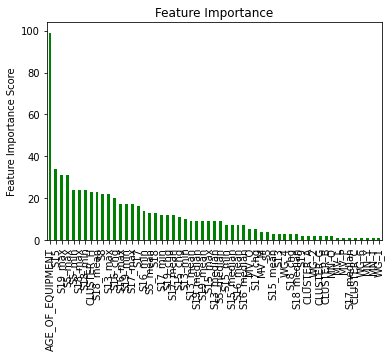

In [59]:
evaluate_model(xgb0, independent, dependent,features) 

In [63]:
df_testing=df_train_test[df_train_test['MODELING_GROUP'] == 'TESTING'].copy()
df_training=df_train_test[df_train_test['MODELING_GROUP'] != 'TESTING'].copy()

In [64]:
df_training['P_FAIL']= xgb0.predict_proba(df_training[features])[:,1];
df_training['Y_FAIL'] = np.where(((df_training.P_FAIL <= .50)), 0, 1)
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(df_training['FAILURE_TARGET'].values, df_training['Y_FAIL']))
print("AUC Score (Train): %f" % metrics.roc_auc_score(df_training['FAILURE_TARGET'], df_training['P_FAIL']))

Accuracy : 0.7814
AUC Score (Train): 0.890161


In [65]:
df_training['P_FAIL']= xgb0.predict_proba(df_training[features])[:,1];
df_training['Y_FAIL'] = np.where(((df_training.P_FAIL <= .67)), 0, 1)
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(df_training['FAILURE_TARGET'].values, df_training['Y_FAIL']))
print("AUC Score (Train): %f" % metrics.roc_auc_score(df_training['FAILURE_TARGET'], df_training['P_FAIL']))

Accuracy : 0.9489
AUC Score (Train): 0.890161


In [66]:
df_testing['P_FAIL']= xgb0.predict_proba(df_testing[features])[:,1];
df_testing['Y_FAIL'] = np.where(((df_testing.P_FAIL <= .67)), 0, 1)
#Print model report:
print("Accuracy : %.4g" % metrics.accuracy_score(df_testing['FAILURE_TARGET'].values, df_testing['Y_FAIL']))
print("AUC Score (Test): %f" % metrics.roc_auc_score(df_testing['FAILURE_TARGET'], df_testing['P_FAIL']))

Accuracy : 0.9364
AUC Score (Test): 0.595508



1. True Positive.  The model predicts the machine will fail, and it does.
2. True Negative.  The model predicts the machine will not fail and it does not fail.
3. False Positive.  The model predicts the machine will fail and it does not fail.
4. False Negative.  The model predicts the machine will not fail and it fails.

These metrics directly correlate to the economic costs of our problem.



In [67]:
display(maintain_df)

,Maintenance Scenario,Number of Incidents,Cost per Incident,Total Cost
0,Unnecessary Maintenance,9,$1500,"$13,500"
1,Timely and Appropriate Maintenance,27,"$7,500","$202,500"
2,Machine Runs to Failure,385,"$30,000","$11,550,000"
3,Total,421,"$27,948","$11,766,000"


A false positive is “Unnecessary Maintenance.”   When your model predicts failure and is not going to fail, you incur unnecessary maintenance costs.

A true positive is “Timely and Appropriate Maintenance.” When your model predicts failure, and it is going to fail, you incur timely and appropriate maintenance costs.

A false negative is “Machine Runs to Failure.” When your model does not predict failure and fails, you incur costs associated with running your machine to failure.

For this use case, this means that a false positive costs $1,500.   

A false negative costs $30,000.   

A true positive costs $7,500. 

A true negative has no cost because no action is taken.
